In [3]:
!pip3 install s1282006_learn 

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip3 show s1282006_learn

Name: s1282006-learn
Version: 2023.7.31
Summary: This software is being developed at the University of Aizu, Aizu-Wakamatsu, Fukushima, Japan
Home-page: https://github.com/satyappp/s1282006_learn
Author: Satyabrata Pahari
Author-email: s1282006@u-aizu.ac.jp
License: GPLv3
Location: /home/tempdsp5/.local/lib/python3.10/site-packages
Requires: matplotlib, numpy, pami, pandas, plotly
Required-by: 


In [5]:
import s1282006_learn

In [ ]:
class frequenciesOfItems:
    """
    frequenciesOfItems is a class for processing a data file and calculating the frequencies of unique items.

    Attributes
    ----------
    file_path : str
        Path to the file containing the items.
    separator : str
        Separator character used in the file. Default is '\t'.
    frequencies : collections.defaultdict
        A dictionary containing the unique items as keys and their frequencies as values.
    """

    def __init__(self, file_name, separator='\t'):
        """
        Initializes frequenciesOfItems with the file name and separator.

        Parameters
        ----------
        file_name : str
            The name of the file to process.
        separator : str
            Separator character used in the file. Default is '\t'.
        """
        self.file_path = os.path.join('./s1282006_learn/statistics', file_name)
        self.separator = separator
        self.frequencies = defaultdict(int)
        self.calculate_frequencies()

    def calculate_frequencies(self):
        """
        Processes the data file and calculates the frequency of each unique item.
        """
        with open(self.file_path, 'r') as file:
            for line in file:
                points = line.strip().split(',')
                for point in points:
                    point = point.strip('\'" ')
                    self.frequencies[point] += 1

    def getFrequencies(self):
        """
        Returns the dictionary of items and their frequencies.

        Returns
        -------
        dict
            A dictionary containing the unique items as keys and their frequencies as values.
        """
        return dict(self.frequencies)

def main():
    """
    Main function to execute the program. It parses the command-line arguments to get the file name to process.
    It then creates an instance of the 'frequenciesOfItems' class, calculates the frequencies of items in the file,
    and prints a success message.

    The function handles exceptions during execution and ensures the files are properly closed before termination.
    """
    parser = argparse.ArgumentParser(description='Process some integers.')
    parser.add_argument('filename', type=str, help='The filename to process')
    args = parser.parse_args()

    file_name = args.filename
    itemsFrequencies = frequenciesOfItems(file_name, ',')
    itemsFreqDictionary = itemsFrequencies.getFrequencies()
    
    print("Frequencies found")

if __name__ == "__main__":
    main()

In [21]:
!python3 s1282006_learn/statistics/frequenciesOfItems.py PM24HeavyPollutionRecordingSensors.csv

Frequencies found


In [19]:
import plotly.express as px
import pandas as pd
import sys
sys.path.append('/home/tempdsp5/Exercise14/s1282006_learn/statistics')
from frequenciesOfItems import frequenciesOfItems

class heatMapItemsFrequencies:
    """
    heatMapItemsFrequencies is a class for creating a heatmap of item frequencies.

    Attributes
    ----------
    freq_dict : dict
        A dictionary containing item locations as keys and their frequencies as values.
    """

    def __init__(self, freq_dict):
        """
        Initializes heatMapItemsFrequencies with the frequency dictionary.

        Parameters
        ----------
        freq_dict : dict
            A dictionary containing item locations as keys and their frequencies as values.
        """
        self.freq_dict = freq_dict

    def prepare_dataframe(self):
        """
        Prepares a pandas DataFrame from the frequency dictionary. The DataFrame has three columns:
        'lon', 'lat', and 'freq', which represent the longitude, latitude, and frequency of items.

        Returns
        -------
        pandas.DataFrame
            A DataFrame with the longitude, latitude, and frequency of items.
        """
        lat = []
        lon = []
        freq = []

        # parsing logic here...

        return pd.DataFrame({
            'lon': lon,
            'lat': lat,
            'freq': freq
        })

    def plot_heatmap(self):
        """
        Plots a heatmap using the prepared DataFrame. The heatmap shows item frequencies in different locations.

        Notes
        -----
        The map style used is "open-street-map" and the default map center and zoom level are set for visualization.
        """
        df = self.prepare_dataframe()

        fig = px.density_mapbox(df, lat='lat', lon='lon', z='freq', radius=10,
                                center=dict(lat=36.686567, lon=135.52000), zoom=3.7,
                                mapbox_style="open-street-map")

        fig.show()

def main():
    """
    Main function to execute the program. It creates an instance of the 'frequenciesOfItems' class,
    calculates the frequencies of items in a specified CSV file, prepares a DataFrame of item frequencies, 
    and plots a heatmap of item frequencies.

    The function handles exceptions during execution and ensures the files are properly closed before termination.
    """
    itemsFrequencies = frequenciesOfItems('PM24HeavyPollutionRecordingSensors.csv', ',')
    itemsFreqDictionary = itemsFrequencies.getFrequencies()

    heatMap = heatMapItemsFrequencies(itemsFreqDictionary)
    heatMap.plot_heatmap()

if __name__ == "__main__":
    main()


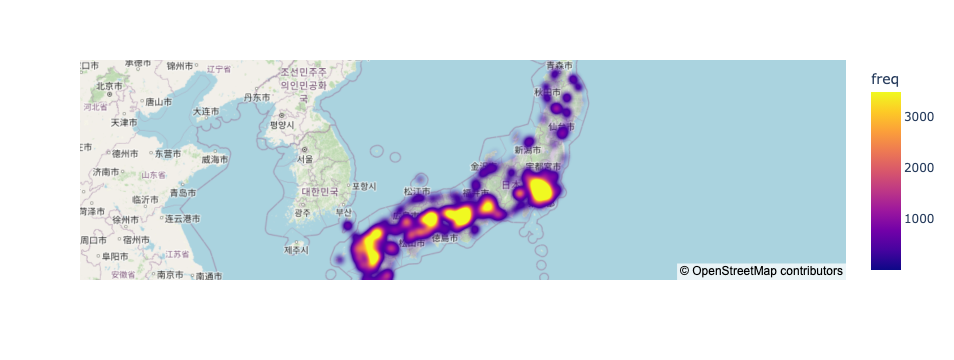

In [16]:
main()

In [11]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# Specify the constraints used in the model
minSup = 20

# Create the object of the mining algorithm 
obj = alg.FPGrowth('PM24HeavyPollutionRecordingSensors.csv', minSup)

# Start the mining process
obj.startMine()

# Print the number of interesting patterns generated
print("Total number of Frequent Patterns:", len(obj.getPatterns()))

# Save the generated patterns in a file
obj.save('frequentPatterns.tsv')

# Determine the memory consumed by the mining algorithm
print("Total Memory in RSS", obj.getMemoryRSS())

# Determine the total runtime consumed by the mining algorithm
print("Total ExecutionTime in seconds:", obj.getRuntime())


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 107
Total Memory in RSS 203259904
Total ExecutionTime in seconds: 0.1495833396911621


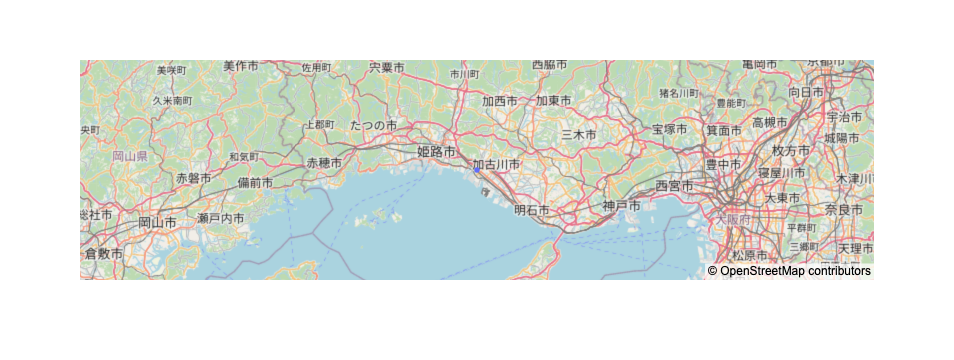

In [26]:
import pandas as pd
import plotly.express as px

# Function to clean point data
def clean_point_data(point_string):
    # Remove unwanted characters
    point_string = point_string.replace("'", "")  # remove "'" characters
    point_string = point_string.replace("(", "")  # remove "(" characters
    point_string = point_string.replace(")", "")  # remove ")" characters
    point_string = point_string.replace("Point", "")  # remove "Point" string
    point_string = point_string.replace("[", "")  # remove "[" characters
    point_string = point_string.replace("]", "")  # remove "]" characters
    
    return point_string.strip().split()

# Read patterns
patterns = pd.read_csv('frequentPatterns.tsv', sep="\t", header=None, names=['pattern', 'frequency'])

# Process patterns to get the count of points
patterns['point_count'] = patterns['pattern'].apply(lambda x: len(x.split(',')))

# Get the longest pattern
longest_pattern = patterns.loc[patterns['point_count'].idxmax()]['pattern']

# Process longest pattern
longest_pattern_points = longest_pattern.split(',')

# Split points into lat and lon
# Split points into lat, lon and frequency
# Split points into lat, lon
lon = []
lat = []
for point in longest_pattern_points:
    try:
        coordinates = clean_point_data(point)
        if len(coordinates) >= 2:  # check if coordinates contains at least 2 elements
            lon.append(float(coordinates[0]))
            
            # split latitude into actual value and discard anything after the colon
            latitude_parts = coordinates[1].split(':')
            lat.append(float(latitude_parts[0]))
    except ValueError as e:
        print(f"Error parsing point {point}: {e}")
        continue

# Ensure lon, lat lists are of the same length
if len(lon) != len(lat):
    print(f"Error: lon and lat lists are of different lengths (lon: {len(lon)}, lat: {len(lat)})")


# Create dataframe for plot
df = pd.DataFrame({
    'lon': lon,
    'lat': lat
})

# Create plot
fig = px.scatter_mapbox(df, lat="lat", lon="lon", zoom=8, mapbox_style="open-street-map")
fig.show()
